# This notebook contains data cleaning and EDA for two dataframes that will primarily be worked on in RStudio.
# This notebook is meant to highlight any data cleaning and insights can be seen from the two dataframes.

# This notebook should better inform what work will be done in RStudio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train_set = pd.read_csv("CompleteResponses.csv")

df_test_set = pd.read_csv("SurveyIncomplete.csv")

In [14]:
df_train_set.describe()

,salary,age,elevel,car,zipcode,credit,brand
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,84870.862257,49.778642,1.982926,10.521924,4.040816,249175.966620,0.621742
std,37712.340836,17.596685,1.420562,5.771435,2.582058,145211.572531,0.484977
min,20000.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,52082.106040,35.000000,1.000000,6.000000,2.000000,120806.813900,0.000000
50%,84949.735155,50.000000,2.000000,11.000000,4.000000,250607.146100,1.000000
75%,117162.043375,65.000000,3.000000,15.750000,6.000000,374639.701800,1.000000
max,150000.000000,80.000000,4.000000,20.000000,8.000000,500000.000000,1.000000


In [15]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salary   9898 non-null   float64
 1   age      9898 non-null   int64  
 2   elevel   9898 non-null   int64  
 3   car      9898 non-null   int64  
 4   zipcode  9898 non-null   int64  
 5   credit   9898 non-null   float64
 6   brand    9898 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 541.4 KB


In [16]:
df_train_set.duplicated().value_counts()

False    9898
dtype: int64

In [17]:
df_train_set.isnull().sum()

salary     0
age        0
elevel     0
car        0
zipcode    0
credit     0
brand      0
dtype: int64

<AxesSubplot:>

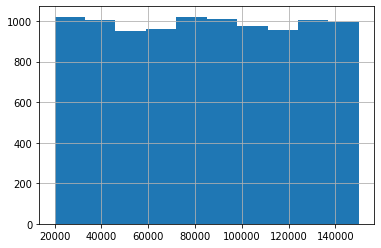

In [19]:
df_train_set["salary"].hist()

<AxesSubplot:>

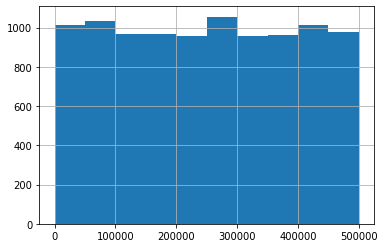

In [59]:
df_train_set["credit"].hist()

<AxesSubplot:>

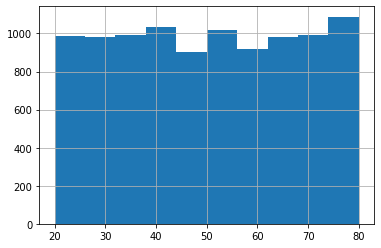

In [20]:
df_train_set["age"].hist()

<AxesSubplot:>

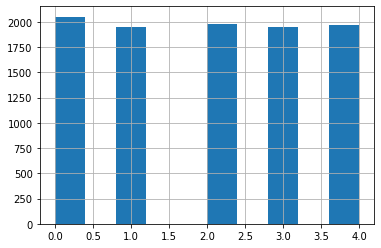

In [42]:
df_train_set["elevel"].hist()

In [24]:
# df["car"] == 20
# 484 people do not have one of the cars mentioned from the survey 

df_train_set["car"].value_counts()

15    542
18    524
8     511
2     509
17    508
5     505
10    500
12    498
7     495
14    494
1     492
19    489
3     488
9     487
20    484
4     479
6     477
11    473
13    473
16    470
Name: car, dtype: int64

In [40]:
print(df_train_set["car"][df_train_set["car"] == 20].groupby(df_train_set["brand"]).value_counts())

no_car_total = 484

no_car_with_acer_percent = (187 / no_car_total) * 100

no_car_with_sony_percent = (297 / no_car_total) * 100

print(no_car_with_acer_percent)
print(no_car_with_sony_percent)

# 39% of people who didn't have one of the cars listed from the survey prefer Acer
# 61% of people who didn't have one of the cars listed from the survey prefer Sony

brand  car
0      20     187
1      20     297
Name: car, dtype: int64
38.63636363636363
61.36363636363637


In [54]:
df_train_set["zipcode"].value_counts()

6    1155
8    1135
2    1112
5    1108
4    1087
0    1085
7    1083
3    1080
1    1053
Name: zipcode, dtype: int64

In [56]:
print(df_train_set["zipcode"].value_counts().sum())

total_central = 1112 + 1080 + 1108 + 1155

print(total_central)

total_zipcode = 9898

total_central_percent = (total_central / total_zipcode) * 100

print(total_central_percent)

# 45% of people came from the Central region 

9898
4455
45.009092746009294


In [57]:
df_train_set.corr()

,salary,age,elevel,car,zipcode,credit,brand
salary,1.000000,0.007979,-0.006620,-0.006091,-0.005471,-0.025127,0.206490
age,0.007979,1.000000,-0.005830,0.010246,0.003681,-0.004401,0.013713
elevel,-0.006620,-0.005830,1.000000,-0.000047,0.018095,0.002721,-0.004829
car,-0.006091,0.010246,-0.000047,1.000000,0.001527,-0.010329,0.005923
zipcode,-0.005471,0.003681,0.018095,0.001527,1.000000,0.004962,0.004665
credit,-0.025127,-0.004401,0.002721,-0.010329,0.004962,1.000000,0.005688
brand,0.206490,0.013713,-0.004829,0.005923,0.004665,0.005688,1.000000


In [58]:
df_train_set.cov()

,salary,age,elevel,car,zipcode,credit,brand
salary,1.422221e+09,5294.673339,-354.663986,-1325.640064,-532.753856,-1.376011e+08,3776.621188
age,5.294673e+03,309.643327,-0.145742,1.040571,0.167266,-1.124483e+04,0.117029
elevel,-3.546640e+02,-0.145742,2.017997,-0.000383,0.066373,5.612196e+02,-0.003327
car,-1.325640e+03,1.040571,-0.000383,33.309462,0.022749,-8.656634e+03,0.016579
zipcode,-5.327539e+02,0.167266,0.066373,0.022749,6.667021,1.860480e+03,0.005842
credit,-1.376011e+08,-11244.833498,561.219579,-8656.634132,1860.479521,2.108640e+10,400.604112
brand,3.776621e+03,0.117029,-0.003327,0.016579,0.005842,4.006041e+02,0.235203


In [4]:
df_train_set["brand"].value_counts()

1    6154
0    3744
Name: brand, dtype: int64

In [6]:
df_train_set["brand"].value_counts().sum()

9898

In [5]:
df_test_set["brand"].value_counts()

0    4937
1      63
Name: brand, dtype: int64

In [7]:
df_test_set["brand"].value_counts().sum()

5000